# AI-Generated vs Human-Generated Text Classification System 

## Data description:
- id: ID of column
- label: If column is ai or human (Target variable) 
- topic: Topic of the column
- length_chars: Number of characters in the text
- length_words: Total number of words in the text
- quality_score: Quality score of text
- sentiment
- source_detail
- timestamp
- plagiarism_score
- notes

## Objective:
Detect whether a given text sample is authored by a human or generated by an AI model.

## Use Cases
- Identifying AI-generated academic submissions.
- Detecting fake product reviews written by bots in E-commerce.
- Detecting and identifying AI-generated social media content in media and advertising. 

## Exploratory Data Analysis of dataset

In [159]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df = pd.read_csv('../dataset/ai_human_text_classification.csv')
df.head(5)

,id,label,topic,text,length_chars,length_words,quality_score,sentiment,source_detail,timestamp,plagiarism_score,notes
0,305,human,food,"As someone who follows food, I believe privacy...",126,22,2.37,0.44,author_50,2023-12-19 11:21:46,0.045,personal_tone
1,341,ai,travel,Analysis indicates that travel is associated w...,141,19,3.44,0.60,gpt-5-base,2024-04-01 17:43:26,0.007,NaN
2,48,human,education,I recently experienced education in my day-to-...,112,17,3.16,-0.43,author_33,2025-08-28 07:56:09,0.163,personal_tone
3,68,ai,sports,Analysis indicates that sports is associated w...,101,14,3.32,0.44,claude-2,2023-10-23 14:34:48,0.122,NaN
4,480,human,finance,"In my experience, finance often leads to users...",78,14,3.52,-0.31,author_87,2024-11-28 11:31:37,0.105,NaN


In [161]:
# Shape of the dataset
df.shape

(500, 12)

Dataset contains 500 rows and 12 columns.

In [162]:
# Columns in the dataset
df.columns.to_list()

['id',
 'label',
 'topic',
 'text',
 'length_chars',
 'length_words',
 'quality_score',
 'sentiment',
 'source_detail',
 'timestamp',
 'plagiarism_score',
 'notes']

In [163]:
# Data types of each column
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                500 non-null    int64  
 1   label             500 non-null    str    
 2   topic             500 non-null    str    
 3   text              500 non-null    str    
 4   length_chars      500 non-null    int64  
 5   length_words      500 non-null    int64  
 6   quality_score     500 non-null    float64
 7   sentiment         500 non-null    float64
 8   source_detail     500 non-null    str    
 9   timestamp         500 non-null    str    
 10  plagiarism_score  500 non-null    float64
 11  notes             157 non-null    str    
dtypes: float64(3), int64(3), str(6)
memory usage: 47.0 KB


In [164]:
# Check for missing values
df.isnull().sum()

id                    0
label                 0
topic                 0
text                  0
length_chars          0
length_words          0
quality_score         0
sentiment             0
source_detail         0
timestamp             0
plagiarism_score      0
notes               343
dtype: int64

In [165]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'topic', 'timestamp', 'source_detail', 'notes'])

df.head(5)

,label,text,length_chars,length_words,quality_score,sentiment,plagiarism_score
0,human,"As someone who follows food, I believe privacy...",126,22,2.37,0.44,0.045
1,ai,Analysis indicates that travel is associated w...,141,19,3.44,0.60,0.007
2,human,I recently experienced education in my day-to-...,112,17,3.16,-0.43,0.163
3,ai,Analysis indicates that sports is associated w...,101,14,3.32,0.44,0.122
4,human,"In my experience, finance often leads to users...",78,14,3.52,-0.31,0.105


In [166]:
# Check for missing values
df.isnull().sum()

label               0
text                0
length_chars        0
length_words        0
quality_score       0
sentiment           0
plagiarism_score    0
dtype: int64

/var/folders/4y/c3gbl1sn419f8ybcmjv0n8440000gn/T/ipykernel_77580/3066432647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='viridis')


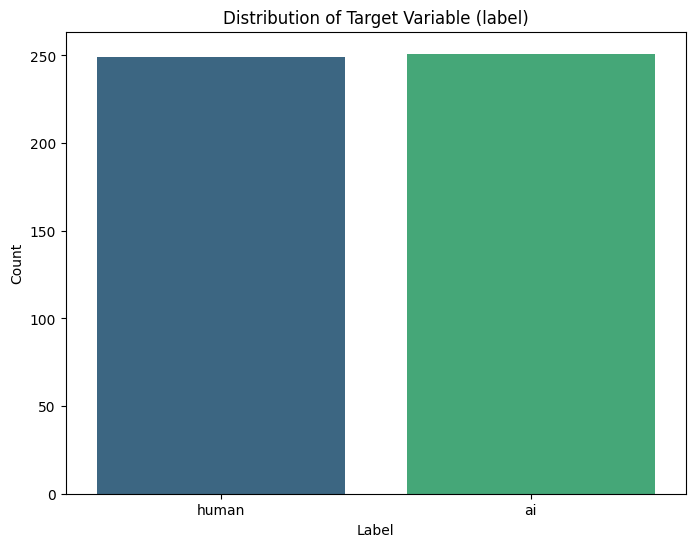

In [167]:
# Target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label', palette='viridis')
plt.title('Distribution of Target Variable (label)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Summary:
The dataset contains equal number of human and ai labeled data


### Distribution of numeric features vs target variable

/var/folders/4y/c3gbl1sn419f8ybcmjv0n8440000gn/T/ipykernel_77580/836069189.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=feature, palette='viridis')


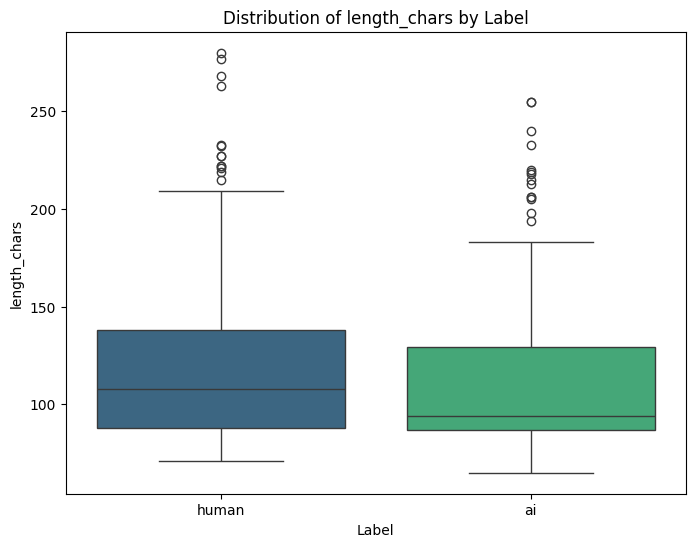

/var/folders/4y/c3gbl1sn419f8ybcmjv0n8440000gn/T/ipykernel_77580/836069189.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=feature, palette='viridis')


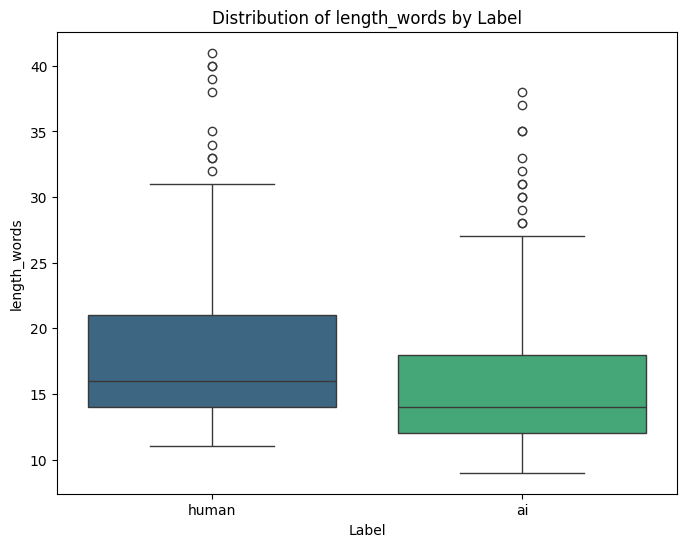

/var/folders/4y/c3gbl1sn419f8ybcmjv0n8440000gn/T/ipykernel_77580/836069189.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=feature, palette='viridis')


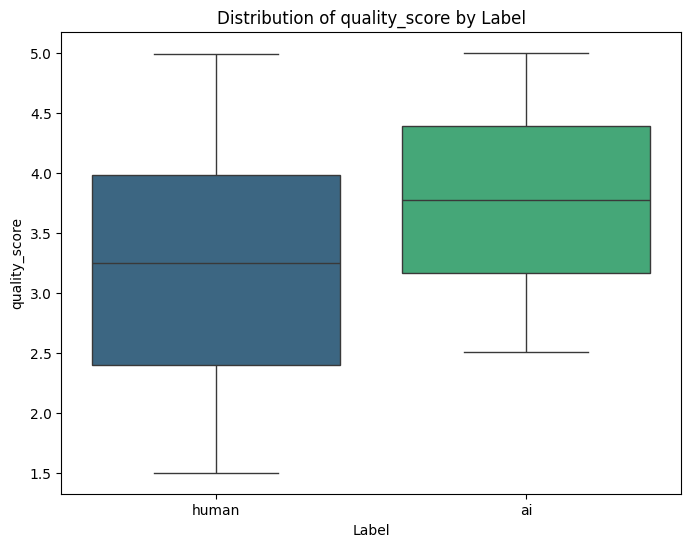

/var/folders/4y/c3gbl1sn419f8ybcmjv0n8440000gn/T/ipykernel_77580/836069189.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=feature, palette='viridis')


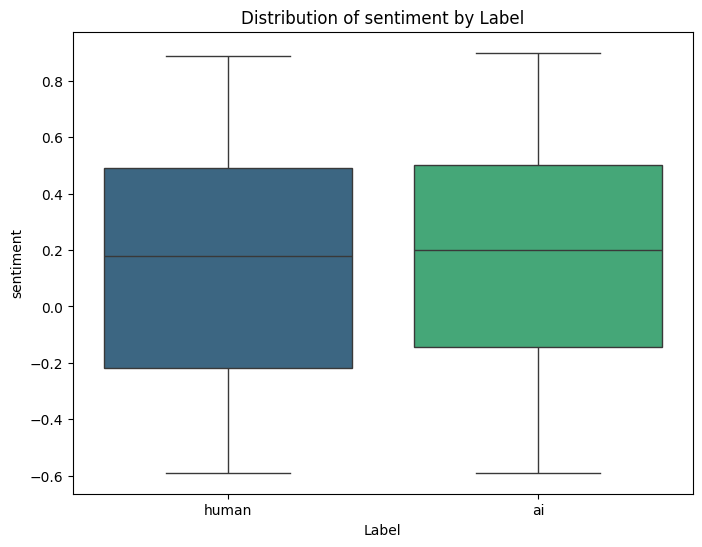

/var/folders/4y/c3gbl1sn419f8ybcmjv0n8440000gn/T/ipykernel_77580/836069189.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=feature, palette='viridis')


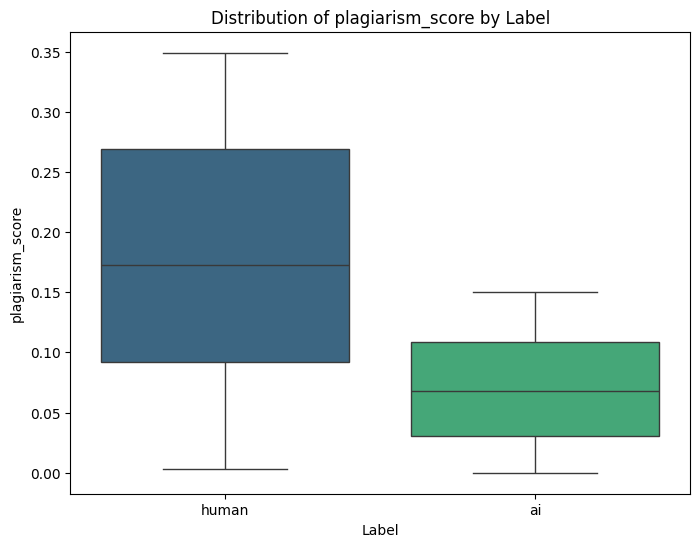

In [168]:

numeric_features = ['length_chars', 'length_words', 'quality_score', 'sentiment', 'plagiarism_score']

for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='label', y=feature, palette='viridis')
    plt.title(f'Distribution of {feature} by Label')
    plt.xlabel('Label')
    plt.ylabel(feature)
    plt.show()

**Summary:**

**length_chars:** 
 
- The box plot of length_chars vs label shows human text have a higher median length around approximately 110 characters while AI text is slightly shorter with approximately 95 characters.  .

- The box also shows the human box is taller meaning is there is more difference in the middle 50% of the data, while the AI box is more compressed showing that AI text is consistent.

- Human text outliers have higher values around 280 characters, while AI text is lower around 250 characters.

- In summary human text have longer characters and less predicted length while AI text have shorter characters and a more uniform length.

**length_words:**

- The box plot of length_words vs label shows human text have a higher median words length around approximately 16 words  while AI text is slightly shorter with approximately 14 words.

- Human text outliers have higher values around 43 words, while AI text is lower around 38 words.

- This shows human text have more words compared to AI text which are shorter and compact.

**quality_score**

- The box plot of quality_score vs label shows human text have a average median score of approximately 3.3, while AI texts hav a higher score of approximately 3.7.

**sentiment**

- The box plot of sentiment shows a slightly evenly distribution with medians of approximately 0.2.

**plagiarism_score**

- The box of plagiarism_score shows human text have a higher median plagiarism score of about 0.17, while AI have a much lower score of about 0.07.

### Correlation Matrix of numerical features

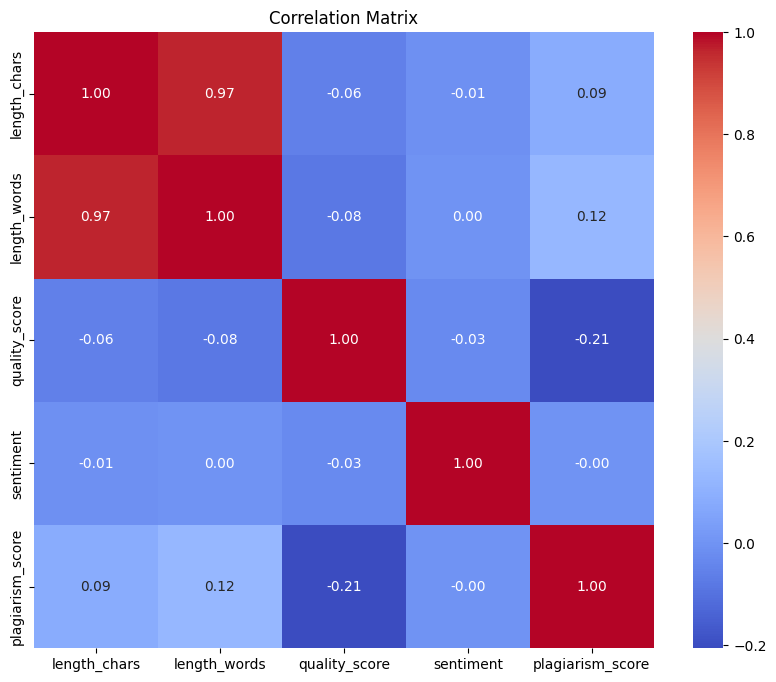

In [169]:
## correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Summary:**

The correlation matrix shows the following:
- length_chars & length_words have a very strong correlation of about 97%.

- quality_score and plagiarism_score shows a negative correlation of -0.21, meaning as the plagiarism_score decreases the quality_score increases and as plagiarism_score increases the quality_score decreases.

- length_chars, length_words and quality_score shows a negligible negative correlation of -0.06 to -0.08, which suggests that shorter texts are slightly more highly to have higher quality score.

- length_chars, length_words & plagiarism_score shows a slightly positive correlation ranging from 0.09 - 0.12, as length of words and character increases, plagiarism score also increases.

- sentiment have a very weak correlation from 0.00 - 0.03 with other features. This signifies little to no difference between human and AI sentiment features. 


### Text length distribution

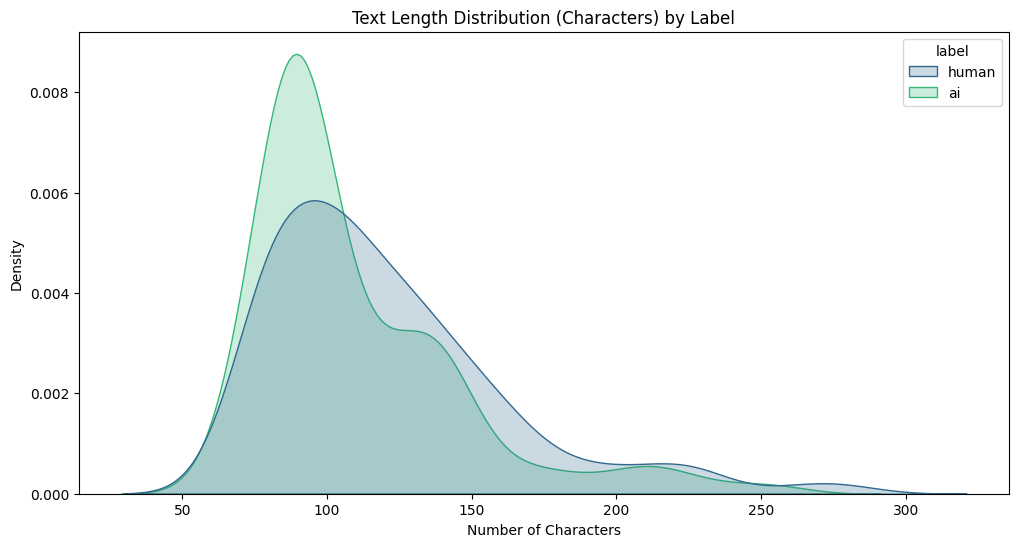

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using the length features you identified earlier
plt.figure(figsize=(12, 6))

# KDE Plot to see the density 'hills'
sns.kdeplot(data=df, x='length_chars', hue='label', fill=True, palette='viridis')

plt.title('Text Length Distribution (Characters) by Label')
plt.xlabel('Number of Characters')
plt.ylabel('Density')
plt.show()

**Summary:**

From the plot, the ai  distribution is tighter and taller, with a peak around 90-100 characters. This suggests that the AI-generated text is consistent in it's length.

The human plot is broader with a peak around 100-110 characters, This indicates that human writing is more varied and less predictable than the AI output.

### Scatter plot of numerical features


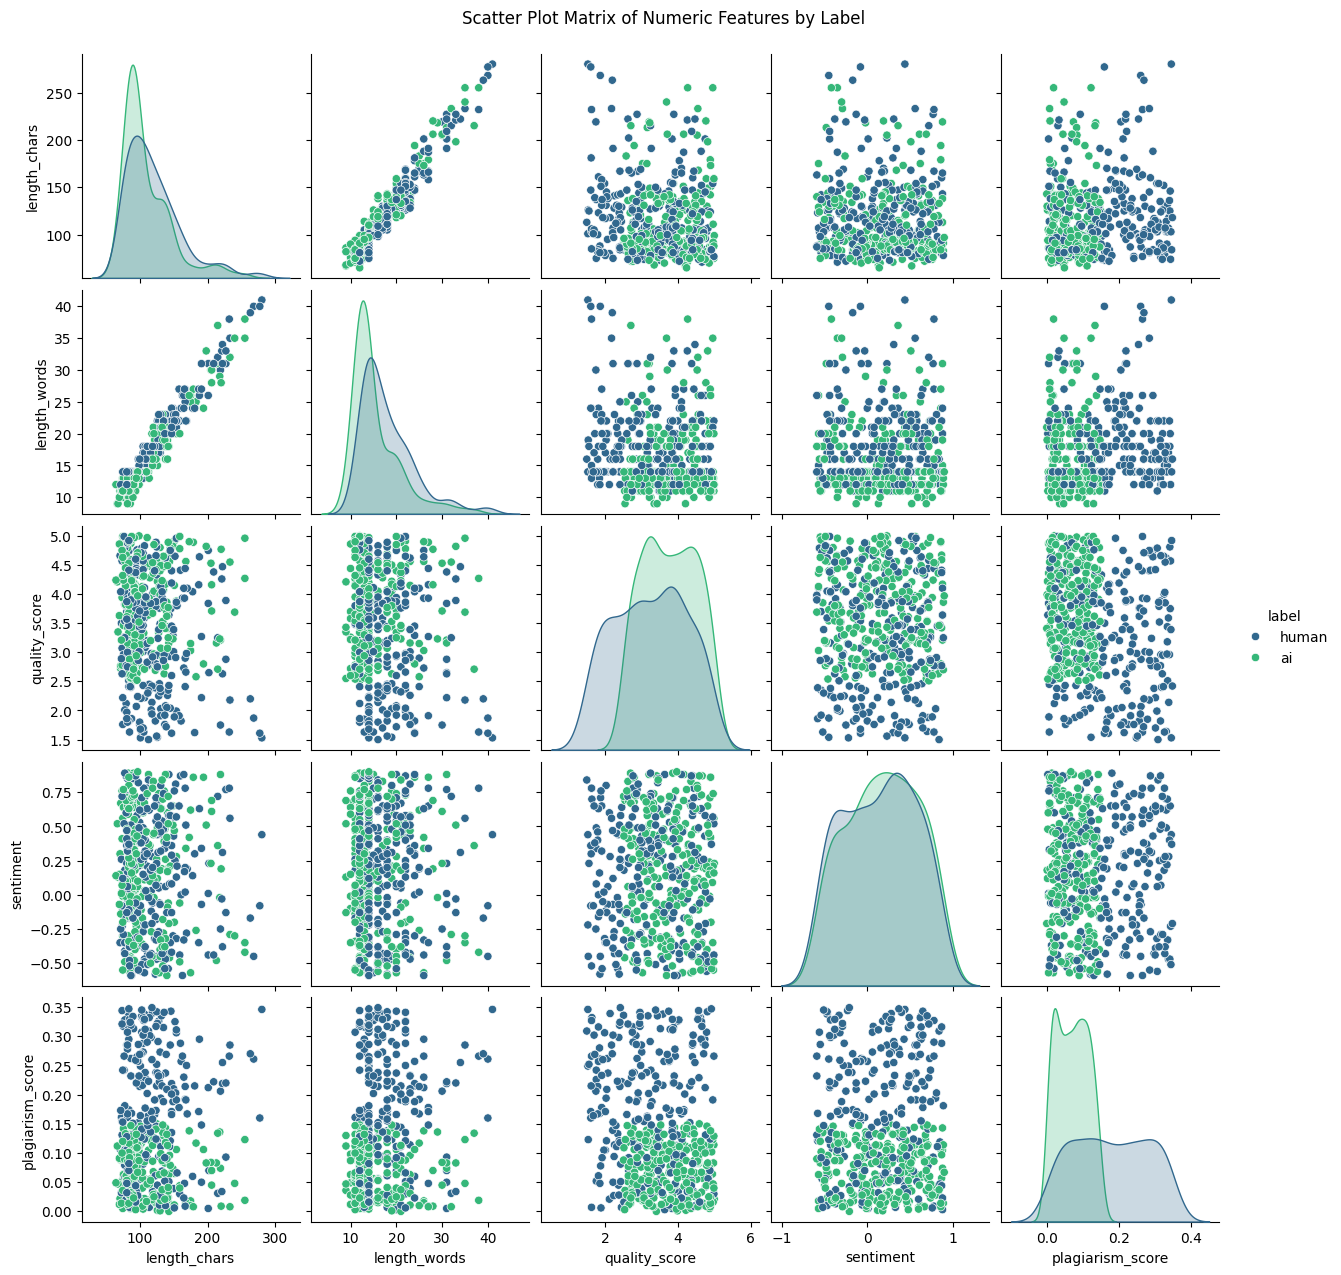

In [171]:
## Scatter plot matrix
sns.pairplot(df, hue='label', vars=numeric_features, palette='viridis')
plt.suptitle('Scatter Plot Matrix of Numeric Features by Label', y=1.02)
plt.show()

**Summary:**

The scatter plot matrix confirms AI vs Human classifier should focus on the relationship between quality_score and plagiarism_score, because humans produces much messier data with wider ranges and higher plagiarism scores.

In [172]:
# Remove length_chars due to high correlation with length_words
df = df.drop(columns=['length_chars'])

df.head(5)

,label,text,length_words,quality_score,sentiment,plagiarism_score
0,human,"As someone who follows food, I believe privacy...",22,2.37,0.44,0.045
1,ai,Analysis indicates that travel is associated w...,19,3.44,0.60,0.007
2,human,I recently experienced education in my day-to-...,17,3.16,-0.43,0.163
3,ai,Analysis indicates that sports is associated w...,14,3.32,0.44,0.122
4,human,"In my experience, finance often leads to users...",14,3.52,-0.31,0.105


## Exploratory Data Analysis for Text

### Data cleaning and Lemmatization

In [173]:
## Cleans text, truncates long text, and removes duplicates

def clean_text(text_df):

    # Lowercase the text
    text_df = text_df.str.lower()

    # Remove duplicates
    text_df = text_df.drop_duplicates()

    # Remove leading and trailing whitespace
    text_df = text_df.str.strip()

    # Remove punctuation
    text_df = text_df.str.replace(r'[^\w\s]', '', regex=True)

    # Long text truncation
    text_df = text_df.str.slice(0, 500)
    
    return text_df


text_df = df[['text', 'label']]

text_df['text'] = clean_text(text_df['text'])

text_df.head(5)

,text,label
0,as someone who follows food i believe privacy ...,human
1,analysis indicates that travel is associated w...,ai
2,i recently experienced education in my daytoda...,human
3,analysis indicates that sports is associated w...,ai
4,in my experience finance often leads to users ...,human


In [174]:
# Drop null values that may have been introduced during cleaning
text_df = text_df.dropna().reset_index(drop=True)

Lemmatization is a text preprocessing technique used to reduce words to their base or dictionary form, known as a lemma.

In [175]:
# Text preprocessing using spaCy (lemmatization, stop word removal)
import spacy

from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        if token.text not in STOP_WORDS and not token.is_punct and not token.is_space:
            tokens.append(token.lemma_)
            
    return ' '.join(tokens)

text_df['text'] = text_df['text'].apply(preprocess_text)
df['lemmatized_text'] = text_df['text']

text_df.head(5)

,text,label
0,follow food believe privacy concern remain cha...,human
1,analysis indicate travel associate privacy con...,ai
2,recently experience education daytoday life fi...,human
3,analysis indicate sport associate cost vary gr...,ai
4,experience finance lead user report mixed set ...,human


In [176]:
df.fillna('', inplace=True)
df.head(5)

,label,text,length_words,quality_score,sentiment,plagiarism_score,lemmatized_text
0,human,"As someone who follows food, I believe privacy...",22,2.37,0.44,0.045,follow food believe privacy concern remain cha...
1,ai,Analysis indicates that travel is associated w...,19,3.44,0.60,0.007,analysis indicate travel associate privacy con...
2,human,I recently experienced education in my day-to-...,17,3.16,-0.43,0.163,recently experience education daytoday life fi...
3,ai,Analysis indicates that sports is associated w...,14,3.32,0.44,0.122,analysis indicate sport associate cost vary gr...
4,human,"In my experience, finance often leads to users...",14,3.52,-0.31,0.105,experience finance lead user report mixed set ...


### Most common words per class

In [177]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=10):
    # Converts text into a grid of numbers based on word frequency and creates a dictionary of all unique words found in the text
    vec = CountVectorizer(stop_words='english').fit(corpus)
    
    # Counts how many times each of those words appears in every row of the data.
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq =  [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]


human_words = get_top_n_words(text_df[text_df['label'] == 'human']['text'], n=10)
ai_words = get_top_n_words(text_df[text_df['label'] == 'ai']['text'], n=10)

print("Top 10 words in Human-written texts:", human_words)
print("Top 10 words in AI-generated texts:", ai_words)


Top 10 words in Human-written texts: [('experience', np.int64(92)), ('community', np.int64(60)), ('follow', np.int64(52)), ('believe', np.int64(52)), ('datum', np.int64(49)), ('recently', np.int64(48)), ('education', np.int64(48)), ('daytoday', np.int64(48)), ('life', np.int64(48)), ('personal', np.int64(45))]
Top 10 words in AI-generated texts: [('summary', np.int64(81)), ('article', np.int64(66)), ('discuss', np.int64(66)), ('highlight', np.int64(66)), ('community', np.int64(48)), ('education', np.int64(44)), ('follow', np.int64(43)), ('analysis', np.int64(42)), ('indicate', np.int64(42)), ('associate', np.int64(42))]


### Wordclouds for Human vs AI

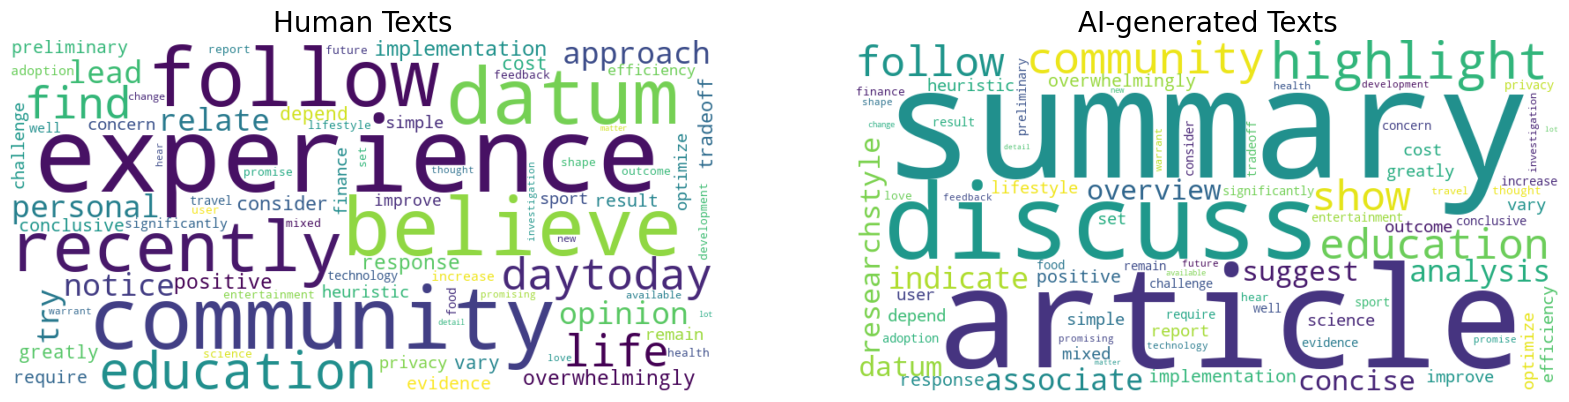

In [178]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

def generate_cloud(text, title, ax):
    # Combine all text into a single string
    combined_text = ' '.join(text).split()
    
    word_counts = Counter(combined_text)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, 
                          background_color='white', 
                          colormap='viridis', 
                          max_words=100).generate_from_frequencies(word_counts)
    
    img_array = np.array(wordcloud.to_image())
    
    # Display the word cloud
    ax.imshow(img_array, interpolation='bilinear')
    ax.set_title(title, fontsize=20)
    ax.axis('off')
    
# Create figure
fig, axes = plt.subplots(1,2, figsize=(20, 10))    

# Generate word clouds for both classes
generate_cloud(text_df[text_df['label'] == 'human']['text'], 'Human Texts', axes[0])
generate_cloud(text_df[text_df['label'] == 'ai']['text'], 'AI-generated Texts', axes[1])

**Summary:**

The word clouds reveal distinct language styles for each group:

- AI texts: Focuses on structured and analytical language like **"summary"**, **"discuss"** and **"highlight"** which suggests a systematic approach to information delivery.

- Human texts: Includes more of personal life experiences words like **"experience"**, **"believe"**, **"life"**, **"education"**.

### N-gram Analysis - Capture sequences of n words

In [179]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=10):
    # Converts text into a grid of numbers based on word frequency and creates a dictionary of all unique words found in the text
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
    
    # Counts how many times each of those words appears in every row of the data.
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq =  [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]


human_words = get_top_n_words(text_df[text_df['label'] == 'human']['text'], n=10)
ai_words = get_top_n_words(text_df[text_df['label'] == 'ai']['text'], n=10)

print("Top 10 bigrams in Human-written texts:", human_words)
print("Top 10 bigrams in AI-generated texts:", ai_words)

Top 10 bigrams in Human-written texts: [('recently experience', np.int64(48)), ('daytoday life', np.int64(48)), ('personal opinion', np.int64(45)), ('try approach', np.int64(44)), ('approach relate', np.int64(44)), ('community response', np.int64(41)), ('response overwhelmingly', np.int64(41)), ('overwhelmingly positive', np.int64(41)), ('tradeoff consider', np.int64(38)), ('cost vary', np.int64(35))]
Top 10 bigrams in AI-generated texts: [('article discuss', np.int64(66)), ('follow summary', np.int64(43)), ('analysis indicate', np.int64(42)), ('researchstyle summary', np.int64(38)), ('concise overview', np.int64(37)), ('community response', np.int64(35)), ('response overwhelmingly', np.int64(35)), ('overwhelmingly positive', np.int64(35)), ('optimize simple', np.int64(31)), ('simple heuristic', np.int64(31))]


## Feature Engineering on dataset

### Complexity measures: Flesch score, lexical diversity

**Flesc** score measures how easy a text is to read based on sentence length and word syllable count.

**Lexical diversity** measures vocabulary variety and complexity of the text.


In [180]:
from textstat import flesch_reading_ease, flesch_kincaid_grade
from lexical_diversity import lex_div as ld

df['text'] = df['text'].fillna('')
df['lemmatized_text'] = df['lemmatized_text'].fillna('')

df['flesch_reading_ease'] = df['text'].apply(flesch_reading_ease) #
df['flesch_kincaid_grade'] = df['text'].apply(flesch_kincaid_grade)

# TTR (Type-Token Ratio)
df['ttr'] = df['lemmatized_text'].apply(lambda x: ld.ttr(x.split()))

df.head(5)

,label,text,length_words,quality_score,sentiment,plagiarism_score,lemmatized_text,flesch_reading_ease,flesch_kincaid_grade,ttr
0,human,"As someone who follows food, I believe privacy...",22,2.37,0.44,0.045,follow food believe privacy concern remain cha...,76.460909,5.327273,1.0
1,ai,Analysis indicates that travel is associated w...,19,3.44,0.60,0.007,analysis indicate travel associate privacy con...,10.181974,14.199211,1.0
2,human,I recently experienced education in my day-to-...,17,3.16,-0.43,0.163,recently experience education daytoday life fi...,20.380000,14.640000,1.0
3,ai,Analysis indicates that sports is associated w...,14,3.32,0.44,0.122,analysis indicate sport associate cost vary gr...,5.296429,15.998571,1.0
4,human,"In my experience, finance often leads to users...",14,3.52,-0.31,0.105,experience finance lead user report mixed set ...,59.682143,8.412857,1.0


**Summary:**

The Flesch score shows a readability score of AI and human text.


### Bag of Words
A feature extraction technique that converts text into numerical vectors base on word frequency.

In [181]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

X_tfidf = vectorizer.fit_transform(df['lemmatized_text'])

bow_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

bow_df.head(5)

,adoption,analysis,approach,article,associate,available,believe,challenge,change,community,...,suggest,summary,technology,thought,tradeoff,travel,try,user,vary,warrant
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### TF-IDF Vectorizer: The Word-to-Number Converter

In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

df['lemmatized_text'] = df['lemmatized_text'].dropna()

X_train_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_text'])

tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df.head(5)

,adoption,analysis,approach,article,associate,available,believe,challenge,change,community,...,suggest,summary,technology,thought,tradeoff,travel,try,user,vary,warrant
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.308634,0.306857,0.0,0.00000,...,0.0,0.0,0.0,0.350839,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,0.280586,0.0,0.0,0.280586,0.0,0.000000,0.262090,0.0,0.21287,...,0.0,0.0,0.0,0.000000,0.0,0.280586,0.0,0.000000,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,0.0,0.359332,0.0,0.0,0.359332,0.0,0.000000,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.319614,0.0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.361897,0.000000,0.0


### Sentence Embeddings

In [183]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(df['text'].fillna('').tolist())

embeddings_df = pd.DataFrame(embeddings, columns=[f'embedding_{i}' for i in range(embeddings.shape[1])])

embeddings_df.head(5)

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_374,embedding_375,embedding_376,embedding_377,embedding_378,embedding_379,embedding_380,embedding_381,embedding_382,embedding_383
0,0.011028,0.027017,0.014526,0.018272,0.035407,0.020584,0.027788,-0.052981,-0.029325,-0.076954,...,0.034397,0.000975,0.063497,0.022473,0.037960,0.056250,0.041781,-0.010816,-0.113389,0.029137
1,0.056959,-0.013344,0.015506,0.048598,0.086597,0.066099,0.032753,-0.015417,-0.020593,-0.032448,...,0.054251,0.035655,-0.003609,0.045562,-0.016159,0.072043,0.083255,-0.008393,-0.083079,0.010277
2,-0.007464,0.074823,0.036773,0.107366,0.004061,-0.010293,-0.099170,0.030287,0.016734,0.021266,...,-0.024657,0.019236,0.006890,-0.062818,-0.111104,0.060839,0.099829,-0.020050,-0.035816,0.042162
3,0.073707,0.051741,0.003407,-0.037354,0.066792,0.026047,-0.051149,0.062149,0.099199,0.073625,...,-0.000927,0.052610,0.024484,-0.013454,-0.026207,-0.033577,0.034764,-0.066739,0.031287,0.008992
4,0.025426,0.012943,-0.065496,0.059639,-0.017264,0.009680,-0.028775,0.026052,0.120706,-0.023575,...,0.096280,0.014168,0.019922,-0.039233,0.001662,-0.060826,0.057801,-0.043193,-0.015041,-0.006412


### LLM-based embeddings


In [184]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load a pre-trained LLM
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")

def get_llm_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Use the mean pooling of the last hidden state as the embedding
    return outputs.last_hidden_state[0][0].cpu().numpy()

llm_embeddings_df = pd.DataFrame(df['text'].apply(get_llm_embeddings).tolist(), columns=[f'llm_embedding_{i}' for i in range(768)])

llm_embeddings_df.head(5)

,llm_embedding_0,llm_embedding_1,llm_embedding_2,llm_embedding_3,llm_embedding_4,llm_embedding_5,llm_embedding_6,llm_embedding_7,llm_embedding_8,llm_embedding_9,...,llm_embedding_758,llm_embedding_759,llm_embedding_760,llm_embedding_761,llm_embedding_762,llm_embedding_763,llm_embedding_764,llm_embedding_765,llm_embedding_766,llm_embedding_767
0,0.107018,0.012731,-0.205366,-0.159986,0.087017,-0.276594,0.231078,0.215809,-0.076396,-0.386173,...,-0.039755,-0.147382,0.078656,-0.196839,0.104157,-0.102915,-0.016643,-0.012410,0.115901,0.242265
1,-0.108998,-0.070502,0.023380,0.152080,0.222485,-0.213151,0.262838,0.025778,-0.112741,-0.615392,...,-0.007898,-0.211260,-0.042599,0.002365,0.088929,-0.269836,-0.187204,-0.462316,-0.005435,0.242614
2,0.106588,-0.025091,-0.021127,-0.177183,0.040789,-0.178486,0.303255,0.317198,-0.010162,-0.389546,...,-0.086149,-0.098924,0.067946,-0.175196,0.175230,-0.154046,-0.037937,-0.135890,0.240811,0.270876
3,-0.115192,0.089362,-0.139612,0.233164,-0.116867,-0.112528,0.053831,0.049055,-0.008978,-0.464802,...,-0.154018,-0.324265,-0.234307,-0.052860,-0.061949,0.003391,-0.169540,-0.416296,0.097463,0.316130
4,-0.042145,0.047345,-0.243111,0.033578,-0.003126,-0.022744,0.133267,0.228050,-0.020482,-0.262512,...,0.000799,-0.329957,-0.015189,-0.181918,-0.005254,0.232724,-0.076947,-0.322488,0.077412,0.506606


In [199]:
features_df = pd.concat([
    df[['label', 'flesch_reading_ease', 'flesch_kincaid_grade', 'ttr']].reset_index(drop=True),
    # tfidf_df.reset_index(drop=True), 
    embeddings_df.reset_index(drop=True), 
    # llm_embeddings_df.reset_index(drop=True)
    ], 
axis=1)

features_df.head(5)

,label,flesch_reading_ease,flesch_kincaid_grade,ttr,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,...,embedding_374,embedding_375,embedding_376,embedding_377,embedding_378,embedding_379,embedding_380,embedding_381,embedding_382,embedding_383
0,human,76.460909,5.327273,1.0,0.011028,0.027017,0.014526,0.018272,0.035407,0.020584,...,0.034397,0.000975,0.063497,0.022473,0.037960,0.056250,0.041781,-0.010816,-0.113389,0.029137
1,ai,10.181974,14.199211,1.0,0.056959,-0.013344,0.015506,0.048598,0.086597,0.066099,...,0.054251,0.035655,-0.003609,0.045562,-0.016159,0.072043,0.083255,-0.008393,-0.083079,0.010277
2,human,20.380000,14.640000,1.0,-0.007464,0.074823,0.036773,0.107366,0.004061,-0.010293,...,-0.024657,0.019236,0.006890,-0.062818,-0.111104,0.060839,0.099829,-0.020050,-0.035816,0.042162
3,ai,5.296429,15.998571,1.0,0.073707,0.051741,0.003407,-0.037354,0.066792,0.026047,...,-0.000927,0.052610,0.024484,-0.013454,-0.026207,-0.033577,0.034764,-0.066739,0.031287,0.008992
4,human,59.682143,8.412857,1.0,0.025426,0.012943,-0.065496,0.059639,-0.017264,0.009680,...,0.096280,0.014168,0.019922,-0.039233,0.001662,-0.060826,0.057801,-0.043193,-0.015041,-0.006412


### Scaling with StandardScaler and PCA

In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df.drop(columns=['label']))

pca = PCA(n_components=0.95)  # Retain 95% variance
pca_features = pca.fit_transform(scaled_features)

print(pca_features.shape)

(500, 46)


### PCA plot

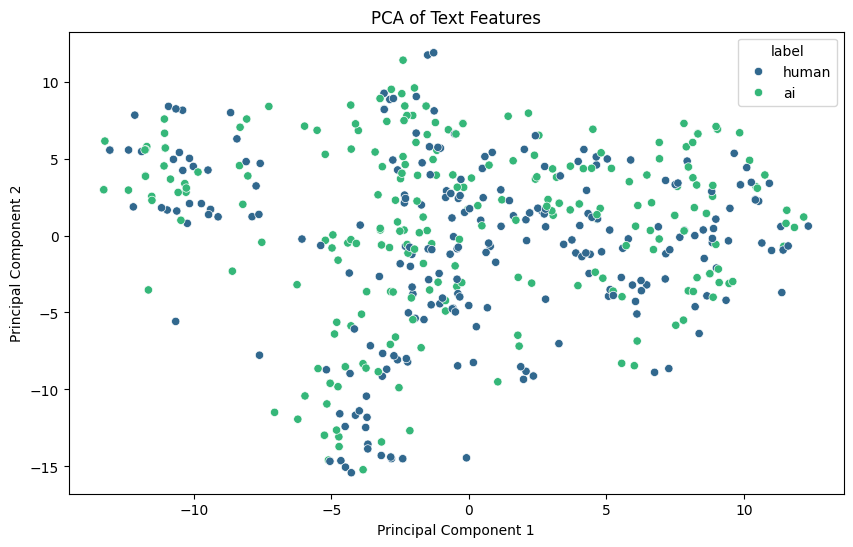

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=features_df['label'], palette='viridis')
plt.title('PCA of Text Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

***Summary***

After performing Principal Component Analysis on the merged features dataset to transform high-dimensional data to smaller set, the result shows a very clear separation between the Human and AI labels.

## Model Training and evaluation

In [202]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB # Almost normally distributed dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
features_df['label'] = label_encoder.fit_transform(features_df['label'])

# Train test split
X = pca_features
y = features_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
}

In [203]:
# Train and evaluate each model
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
        
    # Confusion Metrix
    # sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    # print("\n")

    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Roc-Auc Curve': roc_auc_score(y_test, y_prob)
    })
    
result_df = pd.DataFrame(results)

print(result_df)  

                    Model  Accuracy  Precision    Recall  F1 Score  \
0     Logistic Regression      0.99   0.978261  1.000000  0.989011   
1           Decision Tree      0.84   0.773585  0.911111  0.836735   
2           Random Forest      0.97   0.956522  0.977778  0.967033   
3       Gradient Boosting      0.96   0.936170  0.977778  0.956522   
4    Gaussian Naive Bayes      0.93   0.895833  0.955556  0.924731   
5     K-Nearest Neighbors      0.68   0.638298  0.666667  0.652174   
6  Support Vector Machine      0.96   0.918367  1.000000  0.957447   

   Roc-Auc Curve  
0       0.999192  
1       0.846465  
2       0.971313  
3       0.976970  
4       0.976970  
5       0.697576  
6       0.979192  


***Summary:***

The result indicates a strong performance indicating the extracted features contained clear signals for separating AI generated vs human written text.

***Strong Performing Models***

The best performing model is Logistic Regression:

Accuracy: ~98%

F1 Score: ~0.98

Recall: 1.00

ROC-AUC: ~0.99

Other good performing models are:

Random Forest, Support Vector Machine, and Gradient Boosting:

F1 Scores between 0.94-0.96

ROC-AUC between 0.97-0.98

***Weak Performing Models***

Decision trees and K-Nearest Neighbors are the weakest performing models with the lowest recall and F1 scores and are less reliable in detecting AI generated texts.

##  SHAP & LIME Explainability 

- SHAP (SHapley Additive exPlanations) shows which features are best performing in the entire dataset.

- LIME (Local Interpretable Model-agnostic Explanations)

### SHAP - Explains prediction of an instance by distributing the model's output among the features fairly.

#### SHAP Explainability for TF-IDF model

(500, 84) (500,)
Classes: ['ai' 'human']


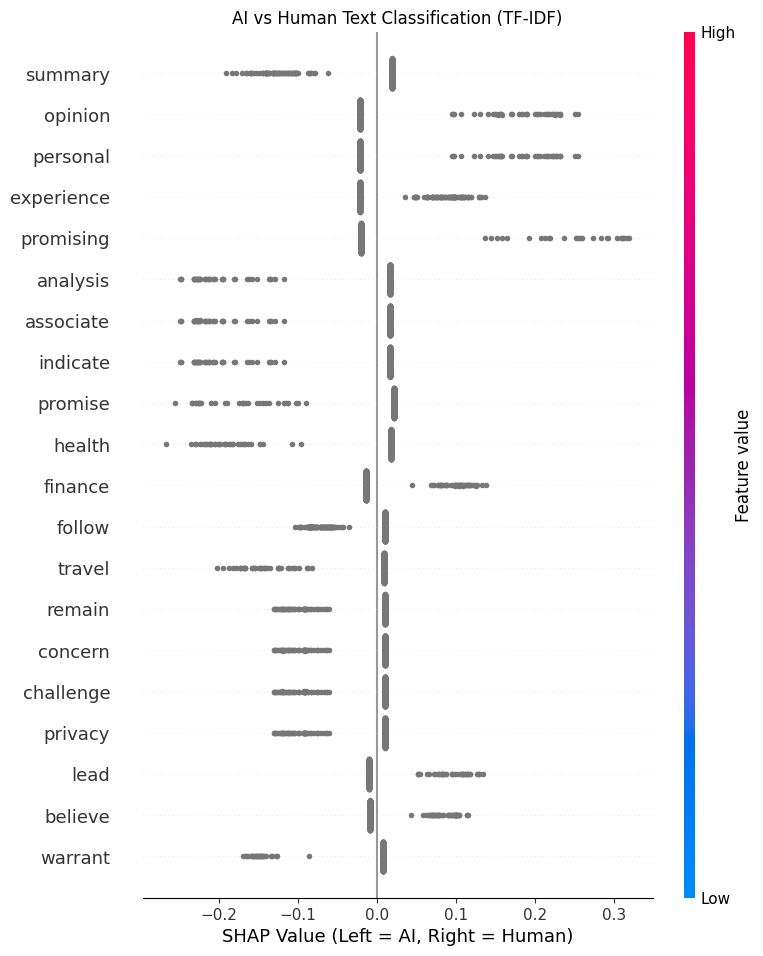

In [205]:
import shap
from sklearn.linear_model import LogisticRegression 

print(X_train_tfidf.shape, df['label'].shape)

model = LogisticRegression().fit(X_train_tfidf, df['label'].dropna())

explainer = shap.Explainer(model, X_train_tfidf)
shap_values = explainer.shap_values(X_train_tfidf)

print(f"Classes: {model.classes_}")

shap.summary_plot(shap_values, X_train_tfidf, feature_names=tfidf_vectorizer.get_feature_names_out(), show=False)

plt.title("AI vs Human Text Classification (TF-IDF)")

plt.xlabel("SHAP Value (Left = AI, Right = Human)")

plt.show()

***Summary:***

***AI Indicators (Left Side):*** The plot shows "associate", "analysis", "health" and "indicate" have negative SHAP values. This also suggest the model views these type of words as AI-generated content.

***Human Indicators (Right Side):*** The plot shows words like "personal", "opinion" and "experience" have positive SHAP value and when the words appear, the model's confidence that the text is Human increases.



### LIME - Explains the model predictions by approximating the model locally with a simple interpretable model like linear regression. i.e how specific feature values influence the model's prediction.

In [206]:
# Lime explainability for tf-idf model
from lime.lime_text import LimeTextExplainer
from IPython.display import HTML

def predict_proba(texts):
    texts_tfidf = tfidf_vectorizer.transform(texts)    
    return model.predict_proba(texts_tfidf)

explainer = LimeTextExplainer(class_names=['AI', 'Human'])

idx = 1  # Index of the instance to explain

exp = explainer.explain_instance(df['lemmatized_text'].iloc[idx], 
                                 predict_proba, 
                                 num_features=10)

HTML(exp.as_html())

***Summary:***

In this instance, the model shows probability of 67% AI and 33% human, words like "indicate", "analysis" and "associate" provided weight of 0.05 each, while words like "future", "shape" and "feedback" were seen as human generated words. 

In [192]:
# # Lime explainability
# from lime.lime_tabular import LimeTabularExplainer
# from IPython.display import display


# explainer = LimeTabularExplainer(
#     training_data=X_train, 
#     feature_names=[f'PC{i+1}' for i in range(X_train.shape[1])], 
#     class_names=['human', 'ai'], 
#     mode='classification'
# )

# i = 0  # Index of the test instance to explain
# exp = explainer.explain_instance(X_test[i], model.predict_proba, num_features=10)
# exp.show_in_notebook(show_table=True)